In [22]:
# This file is created to practise of pandas famework 

In [23]:
import pandas as pd 
import numpy as np

In [24]:
# Makinf a dataframe of 2d with list 
list1 = [['abc',1],['def',2],['ghi',3]]
df = pd.DataFrame(list1)
display(df)

,0,1
0,abc,1
1,def,2
2,ghi,3


In [25]:
# adding column name
column = ['Alphabet', 'Number']
df = pd.DataFrame(list1, columns=column)
display(df)

,Alphabet,Number
0,abc,1
1,def,2
2,ghi,3


In [26]:
# Using pd.Dataframe.from_records()
# This method is ideal for working with the sequence of records like list, tuples, dict or objects 
# It treats each item like a row of data
# When to use ?? Use when your data is sstructed like records
# Often from  JSON , CSV or database fetches 

records = [('John', 19), ('Joe', 21)]
df =  pd.DataFrame.from_records(records, columns=['Name', 'Age'])
display(df)

,Name,Age
0,John,19
1,Joe,21


In [27]:
# pd.DataFrame.from_dict()
# When to use ?? Use it when you have dictionary based data 
# If orient = 'index' the keys are treated as row indices

data = {
    'name': ['a','b','c'],
    'age': [18,19,20],
    'div':['x','y','z']
}

df =  pd.DataFrame.from_dict(data, orient='index')
display(df)
df =  pd.DataFrame.from_dict(data)
df

,0,1,2
name,a,b,c
age,18,19,20
div,x,y,z


,name,age,div
0,a,18,x
1,b,19,y
2,c,20,z


No matter how we are creating the datatypes we can specify them using dtype arguement or by assiging the types after creation

In [28]:
try:
    df = pd.DataFrame(data, dtype='float' )
except Exception as e :
    print("The error is :",e)
else:
    display(df)
# In this dataframe the column include the str so it will generate the error 
# instead of this we can use 
ddf = pd.DataFrame(data)
ddf = ddf.astype({'age':'float'})
display(ddf)

The error is : could not convert string to float: 'a'


,name,age,div
0,a,18.0,x
1,b,19.0,y
2,c,20.0,z


In [29]:
# adding new column in the data Frame 
ddf['N_col'] = ['Tiger','Lion','Elephant']
ddf['N_Int'] = [11,12,122]
ddf

,name,age,div,N_col,N_Int
0,a,18.0,x,Tiger,11
1,b,19.0,y,Lion,12
2,c,20.0,z,Elephant,122


In [30]:
ddf = ddf.astype({
    'age' :'float',
    'N_Int':'complex',
    'div':'bool'
})
display(ddf)

,name,age,div,N_col,N_Int
0,a,18.0,True,Tiger,11.0+ 0.0j
1,b,19.0,True,Lion,12.0+ 0.0j
2,c,20.0,True,Elephant,122.0+ 0.0j


In [31]:
ddf = ddf.transpose()
ddf

,0,1,2
name,a,b,c
age,18.0,19.0,20.0
div,True,True,True
N_col,Tiger,Lion,Elephant
N_Int,(11+0j),(12+0j),(122+0j)


In [32]:
data = [['Geek1', 28, 'Engineer'],
        ['Geek2', None, 'Data Scientist'],
        ['Geek3', 32, None]]

columns =  ['Name', 'Age','Designation']

df = pd.DataFrame(data , columns=columns)
print(df)

    Name   Age     Designation
0  Geek1  28.0        Engineer
1  Geek2   NaN  Data Scientist
2  Geek3  32.0            None


In [33]:
df = df.replace({'None':np.nan})
df

,Name,Age,Designation
0,Geek1,28.0,Engineer
1,Geek2,NaN,Data Scientist
2,Geek3,32.0,None


In [34]:
data = [['Geek1', 28, 'Engineer'],
        ['Geek2', 25, 'Data Scientist'],
        ['Geek3', '32', 'Manager']]
# here the age is declared as string 
# to_string only can be done when there is only digit in the str 

df = pd.DataFrame(data, columns=columns)


display(df)
# print(df['Age'].dtype)
df['Age'] = pd.to_numeric(df.Age, errors='coerce', downcast='integer')
print(df)

,Name,Age,Designation
0,Geek1,28,Engineer
1,Geek2,25,Data Scientist
2,Geek3,32,Manager


    Name  Age     Designation
0  Geek1   28        Engineer
1  Geek2   25  Data Scientist
2  Geek3   32         Manager


In [35]:
data = [('ANSH', 22, 9),
        ('SAHIL', 22, 6),
        ('JAYAN', 23, 8),
        ('AYUSHI', 21, 7),
        ('SPARSH', 20, 8) ]
df = pd.DataFrame.from_records(data, columns=['name', 'age', 'score'])
df

,name,age,score
0,ANSH,22,9
1,SAHIL,22,6
2,JAYAN,23,8
3,AYUSHI,21,7
4,SPARSH,20,8


In [36]:
df.columns =  df.columns.str.capitalize()
df 

,Name,Age,Score
0,ANSH,22,9
1,SAHIL,22,6
2,JAYAN,23,8
3,AYUSHI,21,7
4,SPARSH,20,8


In [37]:
df = df.transpose()

In [38]:
df

,0,1,2,3,4
Name,ANSH,SAHIL,JAYAN,AYUSHI,SPARSH
Age,22,22,23,21,20
Score,9,6,8,7,8


In [39]:
df = df.transpose()
df.index = df.index.astype(str).str.upper()
df

,Name,Age,Score
0,ANSH,22,9
1,SAHIL,22,6
2,JAYAN,23,8
3,AYUSHI,21,7
4,SPARSH,20,8


In [40]:
df = df.transpose()
df

,0,1,2,3,4
Name,ANSH,SAHIL,JAYAN,AYUSHI,SPARSH
Age,22,22,23,21,20
Score,9,6,8,7,8


### Transform vs Apply()

In [41]:
# transfrom return shape matches original 
# works element wise : each group returns something the sam e size as the input
# Ideal when you want to add new column to the dataframe 
# Output shape is always aligned with the original index
 
# df['score_mean'] = df.groupby('AGE')['SCORE'].transform('mean')
# df

In [43]:
# apply() - Flexible , but shape may change 
# Can return aggregated results, series or even dataframe 

# print(df.groupby(['Age'])['Score'].apply(lambda x: x.mean()))


In [ ]:
df['score_mean_apply']= df.groupby('Age')['Score'].apply(lambda x: x.mean())
df
# This will give the missing values because there is 4 output and we need 5 answer to fill the column 

,Name,Age,Score,score_mean_apply
0,ANSH,22,9,NaN
1,SAHIL,22,6,NaN
2,JAYAN,23,8,NaN
3,AYUSHI,21,7,NaN
4,SPARSH,20,8,NaN


In [ ]:
df['score_mean_apply']= df.groupby('Age')['Score'].transform(lambda x: x.mean())
df

,Name,Age,Score,score_mean_apply
0,ANSH,22,9,7.5
1,SAHIL,22,6,7.5
2,JAYAN,23,8,8.0
3,AYUSHI,21,7,7.0
4,SPARSH,20,8,8.0


### Pivot vs Pivot_Table()

Pivoting is a powerful technique to reshape detailed (long - form) data into a summary table (wide-form ) --ideal for spotting trends and comparing group statistics.

pivot() --  Strict but Simple

* Best used when your data is perfectly clean, meaning there is one unique value for every combination of index and columns.

* Converts rows into columns for easier comparison.

* It is fast and straightforward, but throws an error if duplicate entries exist.

In [ ]:
data = [('ANSH', 22, 9),
        ('SAHIL', 22, 6),
        ('JAYAN', 23, 8),
        ('AYUSHI', 21, 7),
        ('SPARSH', 20, 8) ]

df = pd.DataFrame(data , columns=['Name','Age','Score'])
df_p = df.pivot(index='Name', columns='Score', values='Age')
print(df_p)

Score      6     7     8     9
Name                          
ANSH     NaN   NaN   NaN  22.0
AYUSHI   NaN  21.0   NaN   NaN
JAYAN    NaN   NaN  23.0   NaN
SAHIL   22.0   NaN   NaN   NaN
SPARSH   NaN   NaN  20.0   NaN


In [ ]:
df_pivot = pd.DataFrame({
    'Department': ['HR', 'HR', 'Sales', 'Sales', 'IT'],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'Salary': [3000, 3200, 4000, 3900, 4500]
})

try:
    pivot = pd.pivot(df, index="Department", columns="Gender", values="Salary")

except Exception as e:
    print(e)

else:
    print(pivot)
    


'Department'


pivot_table() — Flexible and Powerful

* Works just like pivot(), but with aggregation support — great for handling duplicates or missing data.

* Lets you group data by one or more keys.

* Supports common aggregations like mean, sum, count, and even multiple functions.

* Accepts multiple columns in index, columns, and values.


In [ ]:
pivot_t = df_pivot.pivot_table(index='Department', columns='Gender', values='Salary', aggfunc='mean')
pivot

Gender,F,M
Department,,
HR,3200.0,3000.0
IT,NaN,4500.0
Sales,3900.0,4000.0


Create a Pandas DataFrame from list of Dictionaries
* df = pd.DataFrame.from_records()  # we can also pass the index
* Using pd.json_normalize()
* df = pd.DataFrame.from_dict()
* Using pd.DataFrame()

In [ ]:
data = [{'This':'dataframe', 'Side':'Using', 'Nirav':'List' },
        {'This': 10, 'Side':20, 'Nirav': 30 }]

df = pd.DataFrame.from_records(data)
display(df)
df = pd.DataFrame.from_dict(data)
display(df)

,This,Side,Nirav
0,dataframe,Using,List
1,10,20,30


,This,Side,Nirav
0,dataframe,Using,List
1,10,20,30


In [ ]:
df = pd.json_normalize(data)
df

,This,Side,Nirav
0,dataframe,Using,List
1,10,20,30


In [ ]:
df = pd.DataFrame(data)
df

,This,Side,Nirav
0,dataframe,Using,List
1,10,20,30


In [ ]:

df = pd.DataFrame({
    'Date': ['2024-01', '2024-01', '2024-02', '2024-02'],
    'Product': ['A', 'A', 'A', 'B'],
    'Sales': [100, 200, 150, 300]
})
display(df)
df.pivot_table(index='Date', columns='Product', values='Sales', aggfunc='sum')


,Date,Product,Sales
0,2024-01,A,100
1,2024-01,A,200
2,2024-02,A,150
3,2024-02,B,300


Product,A,B
Date,,
2024-01,300.0,NaN
2024-02,150.0,300.0


In [ ]:
df.sort_values('Sales', ascending=False)

,Date,Product,Sales
3,2024-02,B,300
1,2024-01,A,200
2,2024-02,A,150
0,2024-01,A,100


In [ ]:
df[df['Sales']<200]

,Date,Product,Sales
0,2024-01,A,100
2,2024-02,A,150


In [ ]:
df.iloc[0:2, 0:2]

,Date,Product
0,2024-01,A
1,2024-01,A


In [ ]:
# with two column indices, values same as ditionary keys

df1 = pd.DataFrame(data, index=['ind1','ind2'],
                   columns=['This', 'Side'])
# With two column indices with one index with other name
df2 = pd.DataFrame(data, index=['indx','indy'])
display(df1)
display(df2)

,This,Side
ind1,dataframe,Using
ind2,10,20


,This,Side,Nirav
indx,dataframe,Using,List
indy,10,20,30


 Convert list of nested dictionaries into Pandas dataframe 
 * Using from_dict(orient='index')
 * Native methods

In [ ]:
countries = {
    "1": {"Country": "New Country 1",
          "Capital": "New Capital 1",
          "Population": "123,456,789"},
    "2": {"Country": "New Country 2",
          "Capital": "New Capital 2",
          "Population": "987,654,321"},
    "3": {"Country": "New Country 3",
          "Capital": "New Capital 3",
          "Population": "111,222,333"}
}
data = pd.DataFrame.from_dict(countries , orient='index')
data

,Country,Capital,Population
1,New Country 1,New Capital 1,"123,456,789"
2,New Country 2,New Capital 2,"987,654,321"
3,New Country 3,New Capital 3,"111,222,333"


In [ ]:
list = [{
        "Student": [{"Exam": 90, "Grade": "a"},
                    {"Exam": 99, "Grade": "b"},
                    {"Exam": 97, "Grade": "c"},
                    ],
        "Name": "Paras Jain"
        },
        {
        "Student": [{"Exam": 89, "Grade": "a"},
                    {"Exam": 80, "Grade": "b"}
                    ],
        "Name": "Chunky Pandey"
        }
        ]

data = pd.DataFrame.from_dict(list)
display(data)



,Student,Name
0,"[{'Exam': 90, 'Grade': 'a'}, {'Exam': 99, 'Gra...",Paras Jain
1,"[{'Exam': 89, 'Grade': 'a'}, {'Exam': 80, 'Gra...",Chunky Pandey


In [ ]:
rows = []

for data in list:
    data_row = data['Student']
    time = data['Name']

    for row in data_row:
        row['Name'] = time
        rows.append(row)
print(rows)


[{'Exam': 90, 'Grade': 'a', 'Name': 'Paras Jain'}, {'Exam': 99, 'Grade': 'b', 'Name': 'Paras Jain'}, {'Exam': 97, 'Grade': 'c', 'Name': 'Paras Jain'}, {'Exam': 89, 'Grade': 'a', 'Name': 'Chunky Pandey'}, {'Exam': 80, 'Grade': 'b', 'Name': 'Chunky Pandey'}]


In [ ]:
df = pd.DataFrame(rows)
display(df)

,Exam,Grade,Name
0,90,a,Paras Jain
1,99,b,Paras Jain
2,97,c,Paras Jain
3,89,a,Chunky Pandey
4,80,b,Chunky Pandey


In [ ]:
df.set_index('Name', inplace =  True) # to make column name in index
display(df)

,Exam,Grade
Name,,
Paras Jain,90,a
Paras Jain,99,b
Paras Jain,97,c
Chunky Pandey,89,a
Chunky Pandey,80,b


In [ ]:
# Using pivot-table
df = df.pivot_table(index='Name', columns=['Grade'],
                    values=['Exam']).reset_index()

df.columns=['NAME','Maths','Physics','Chemistry']

print(df)

            NAME  Maths  Physics  Chemistry
0  Chunky Pandey   89.0     80.0        NaN
1     Paras Jain   90.0     99.0       97.0


In [ ]:
df = pd.DataFrame({'City':['New York', 'Parague', 'New Delhi', 'Venice', 'new Orleans'],
                    'Event':['Music', 'Poetry', 'Theatre', 'Comedy', 'Tech_Summit'],
                    'Cost':[10000, 5000, 15000, 2000, 12000]})
display(df)

,City,Event,Cost
0,New York,Music,10000
1,Parague,Poetry,5000
2,New Delhi,Theatre,15000
3,Venice,Comedy,2000
4,new Orleans,Tech_Summit,12000


In [ ]:
index_ = [pd.Period('02-2018', freq='M'), pd.Period('04-2018', freq='M'),
          pd.Period('06-2018', freq='M'), pd.Period('10-2018', freq='M'), pd.Period('12-2018', freq='M')]

df.index = index_

display(df)

,City,Event,Cost
2018-02,New York,Music,10000
2018-04,Parague,Poetry,5000
2018-06,New Delhi,Theatre,15000
2018-10,Venice,Comedy,2000
2018-12,new Orleans,Tech_Summit,12000


In [ ]:
df['City'] = df['City'].replace('[nN]ew',  'New_', regex=True)
df

,City,Event,Cost
2018-02,New_ York,Music,10000
2018-04,Parague,Poetry,5000
2018-06,New_ Delhi,Theatre,15000
2018-10,Venice,Comedy,2000
2018-12,New_ Orleans,Tech_Summit,12000


In [ ]:

df = pd.DataFrame({'Date':['10/2/2011', '11/2/2011', '12/2/2011', '13/2/2011'],
                   'Product':[' UMbreLla', '  maTtress', 'BaDmintoN ', 'Shuttle'],
                   'Updated_Price':[1250, 1450, 1550, 400],
                   'Discount':[10, 8, 15, 10]})

df

,Date,Product,Updated_Price,Discount
0,10/2/2011,UMbreLla,1250,10
1,11/2/2011,maTtress,1450,8
2,12/2/2011,BaDmintoN,1550,15
3,13/2/2011,Shuttle,400,10


In [ ]:
df['Product'] = df['Product'].apply(lambda x : x.strip().capitalize())
df

,Date,Product,Updated_Price,Discount
0,10/2/2011,Umbrella,1250,10
1,11/2/2011,Mattress,1450,8
2,12/2/2011,Badminton,1550,15
3,13/2/2011,Shuttle,400,10


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
display(df)

,Date,Product,Updated_Price,Discount
0,2011-02-10,Umbrella,1250,10
1,2011-02-11,Mattress,1450,8
2,2011-02-12,Badminton,1550,15
3,2011-02-13,Shuttle,400,10


In [ ]:
new_index = [3,0,2,5,1]
new_co_index = ['Date', 'Product', 'Updated_Price', 'Discount','Temp']
a = df.reindex(new_index,columns=new_co_index, fill_value=0)
display(a)

,Date,Product,Updated_Price,Discount,Temp
3,2011-02-13 00:00:00,Shuttle,400,10,0
0,2011-02-10 00:00:00,Umbrella,1250,10,0
2,2011-02-12 00:00:00,Badminton,1550,15,0
5,0,0,0,0,0
1,2011-02-11 00:00:00,Mattress,1450,8,0


In [ ]:
a_temp = df.reindex(new_index, columns=new_co_index)
a_fill = a_temp.ffill()
a_fill = a_fill.ffill(axis=1)
display(a_fill)

,Date,Product,Updated_Price,Discount,Temp
3,2011-02-13 00:00:00,Shuttle,400.0,10.0,10.0
0,2011-02-10 00:00:00,Umbrella,1250.0,10.0,10.0
2,2011-02-12 00:00:00,Badminton,1550.0,15.0,15.0
5,2011-02-12 00:00:00,Badminton,1550.0,15.0,15.0
1,2011-02-11 00:00:00,Mattress,1450.0,8.0,8.0


In [ ]:
initial_data = {'First_name': ['Ram', 'Mohan', 'Tina', 'Jeetu', 'Meera', 'happens'],
                'Last_name': ['Kumar', 'Sharma', 'Ali', 'Gandhi', 'Kumari', 'Nothing'],
                'Age': [42, 52, 36, 21, 23, 99],
                'City': ['Mumbai', 'Noida', 'Pune', 'Delhi', 'Bihar', 'nooo']}


df = pd.DataFrame(initial_data)
df

,First_name,Last_name,Age,City
0,Ram,Kumar,42,Mumbai
1,Mohan,Sharma,52,Noida
2,Tina,Ali,36,Pune
3,Jeetu,Gandhi,21,Delhi
4,Meera,Kumari,23,Bihar
5,happens,Nothing,99,nooo


In [ ]:

# Create new column using dictionary
new_data = { "Ram":"B.Com",
            "Mohan":"IAS",
            "Tina":"LLB",
            "Jeetu":"B.Tech",
            "Meera":"MBBS",
            "Teena": "Noneed" }

df['Qualification'] = df['First_name'].map(new_data)
df

,First_name,Last_name,Age,City,Qualification
0,Ram,Kumar,42,Mumbai,B.Com
1,Mohan,Sharma,52,Noida,IAS
2,Tina,Ali,36,Pune,LLB
3,Jeetu,Gandhi,21,Delhi,B.Tech
4,Meera,Kumari,23,Bihar,MBBS
5,happens,Nothing,99,nooo,NaN


What happened in the above table

Key in First_name : There is NaN in qualification because there is no teena in the dataframe 

Key in newdata not in First_name ignored silently 


Method 2: Using replace function 
* with regex
* without regex

In [ ]:
# Creating new dataframe
import pandas as pd
initial_data = {'First_name': ['Ramm', 'Mohan', 'Tina', 'Jeetu', 'Meera'],
                'Last_name': ['Kumar', 'Sharma', 'Ali', 'Gandhi', 'Kumari'],
                'Age': [42, 52, 36, 21, 23],
                'City': ['Mumbai', 'Noida', 'Pune', 'Delhi', 'Bihar']}

df = pd.DataFrame(initial_data, columns=['First_name','Last_name', 'Age', 'City'])


df

,First_name,Last_name,Age,City
0,Ramm,Kumar,42,Mumbai
1,Mohan,Sharma,52,Noida
2,Tina,Ali,36,Pune
3,Jeetu,Gandhi,21,Delhi
4,Meera,Kumari,23,Bihar


In [ ]:
new_data = { "Ramm":"Ram",
            "Tina":"Riya",
            "Jeetu":"Jitender" }

print(df, end="\n\n")

  First_name Last_name  Age    City
0       Ramm     Kumar   42  Mumbai
1      Mohan    Sharma   52   Noida
2       Tina       Ali   36    Pune
3      Jeetu    Gandhi   21   Delhi
4      Meera    Kumari   23   Bihar



In [ ]:
df = df.replace({'First_name':new_data})
print(df)

  First_name Last_name  Age    City
0        Ram     Kumar   42  Mumbai
1      Mohan    Sharma   52   Noida
2       Riya       Ali   36    Pune
3   Jitender    Gandhi   21   Delhi
4      Meera    Kumari   23   Bihar


In [ ]:
# Update work on the index

initial_data = {'First_name': ['Ram', 'Mohan', 'Tina', 'Jeetu', 'Meera'],
                'Last_name': ['Kumar', 'Sharma', 'Ali', 'Gandhi', 'Kumari'],
                'Age': [42, 52, 36, 21, 23],
                'City': ['Mumbai', 'Noida', 'Pune', 'Delhi', 'Bihar']}

new_data = { 0:"Shyam",
            2:"Riya",
            3:"Jitender" }


df = pd.DataFrame(initial_data)
display(df)
# df["First_name"].update(pd.Series(new_data)) #this will give the warning
df.update(pd.DataFrame({"First_name": new_data}))

display(df)

,First_name,Last_name,Age,City
0,Ram,Kumar,42,Mumbai
1,Mohan,Sharma,52,Noida
2,Tina,Ali,36,Pune
3,Jeetu,Gandhi,21,Delhi
4,Meera,Kumari,23,Bihar


,First_name,Last_name,Age,City
0,Shyam,Kumar,42,Mumbai
1,Mohan,Sharma,52,Noida
2,Riya,Ali,36,Pune
3,Jitender,Gandhi,21,Delhi
4,Meera,Kumari,23,Bihar


To ungroup the group we use unstack()

In [ ]:
data = {
    'Department': ['Sales', 'Sales', 'HR', 'HR'],
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Salary': [5000, 5200, 4800, 5100]
}
df = pd.DataFrame(data)
df

,Department,Gender,Salary
0,Sales,Male,5000
1,Sales,Female,5200
2,HR,Male,4800
3,HR,Female,5100


In [ ]:
df_g = df.groupby(['Department','Gender'])['Salary'].mean()
print(df_g)

Department  Gender
HR          Female    5100.0
            Male      4800.0
Sales       Female    5200.0
            Male      5000.0
Name: Salary, dtype: float64


In [ ]:
df_u = df_g.unstack()
print(df_u)

Gender      Female    Male
Department                
HR          5100.0  4800.0
Sales       5200.0  5000.0


melt()

The melt() method in pandas is your go-to tool when you need to transform wide-format data into long-format — essentially doing the opposite of a pivot. It’s perfect for turning column headers into row values, making your data tidy and ready for analysis.

Why use melt()? It simplifies datasets where values are spread across multiple columns but would be better analyzed in a key-value format.

In [ ]:
df = pd.DataFrame({
    'Name': ['Ansh', 'Harsh'],
    'Math':[66,89],
    'Science':[99,67]
})
print(df)

    Name  Math  Science
0   Ansh    66       99
1  Harsh    89       67


In [ ]:
df_melted = df.melt( id_vars="Name",var_name='Subject', value_name='Marks')
df_melted

,Name,Subject,Marks
0,Ansh,Math,66
1,Harsh,Math,89
2,Ansh,Science,99
3,Harsh,Science,67


Key parameters: id_vars: Columns to keep as identifiers (they won’t be unpivoted)

var_name: Name of the new column for former column headers

value_name: Name of the new column for values

How pandas figures it out: id_vars='Name' → This tells pandas: “Hey, keep the Name column as is.”

Everything else (like Math and Science) → Becomes part of the Subject column — because they’re the column headers being melted.

Their cell values (like 90, 85, 80, 89) → Go under the new column called Marks, which you assigned using value_name='Marks'.

### Reset Index in Pandas Dataframe
Syntax :

DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

Parameters:

* level: Specifies multi-level index levels to reset.
* drop: Discards current index if True; adds as a new column if False.
* inplace: Modifies DataFrame in place if True; returns a new DataFrame if False.
* col_level: Specifies which level of multi-level columns to reset.
* col_fill: Fills missing values in columns' levels. Return Type: Returns a new DataFrame if inplace is False; None if inplace is True
used methods

* Create Own Index Without Removing Default Index
* Create your Own Index and Remove the Default Index
* Reset Own Index and Create Default Index as Index
* Make a Column of Dataframe as Index and Removing Default Index
* Make a Column of Dataframe as an Index Without Removing Index

In [ ]:
data = {
    'Name':['Nirav', 'Vala',' Arpi',' Vaibhav ', 'Thapa'],
    'Age':[19,15,16,17,18,],
    'Address':['Surat', 'Gandhinagar', 'Vadodara', 'Karnavati', 'Daman'],
    'Qualification':['12th', '10th', '10th','11th', '11th']
}

df = pd.DataFrame.from_dict(data)
print(df)

        Name  Age      Address Qualification
0      Nirav   19        Surat          12th
1       Vala   15  Gandhinagar          10th
2       Arpi   16     Vadodara          10th
3   Vaibhav    17    Karnavati          11th
4      Thapa   18        Daman          11th


In [ ]:
df['Name'] = df['Name'].apply(lambda x: x.strip())

In [ ]:
df

,Name,Age,Address,Qualification
0,Nirav,19,Surat,12th
1,Vala,15,Gandhinagar,10th
2,Arpi,16,Vadodara,10th
3,Vaibhav,17,Karnavati,11th
4,Thapa,18,Daman,11th


In [ ]:
list = []
for i in df['Name']:
    list.append(i)

print(list)

['Nirav', 'Vala', 'Arpi', 'Vaibhav', 'Thapa']


In [ ]:
#Create Own Index without Removing Default Index

index_ = ['h','e','l','l','o']
df = pd.DataFrame(data, index=index_)
df


,Name,Age,Address,Qualification
h,Nirav,19,Surat,12th
e,Vala,15,Gandhinagar,10th
l,Arpi,16,Vadodara,10th
l,Vaibhav,17,Karnavati,11th
o,Thapa,18,Daman,11th


In [ ]:
df.reset_index(inplace=True , drop = True )
df

,Name,Age,Address,Qualification
0,Nirav,19,Surat,12th
1,Vala,15,Gandhinagar,10th
2,Arpi,16,Vadodara,10th
3,Vaibhav,17,Karnavati,11th
4,Thapa,18,Daman,11th


In [ ]:
df = pd.DataFrame(data , index_)
df.set_index(['Age'], inplace=True)
df
print(df.loc[17])

Name              Vaibhav 
Address          Karnavati
Qualification         11th
Name: 17, dtype: object


In [ ]:
df.reset_index(level=['Age'], inplace=True)
df

,Age,Name,Address,Qualification
0,19,Nirav,Surat,12th
1,15,Vala,Gandhinagar,10th
2,16,Arpi,Vadodara,10th
3,17,Vaibhav,Karnavati,11th
4,18,Thapa,Daman,11th


Changing Column Names and Row Indexes in Pandas

* Method 1: Using .columns and .index directly

* Method 2: Using .rename() with a dictionary

* Method 3: With lambda functions Dynamically change all names

* Method 4: Using .columns.values Modify a specific column name

In [ ]:
df = pd.DataFrame({
    "Name": ['Tom', 'Nick', 'John', 'Peter'],
    "Age": [15, 26, 17, 28]
})
print("Original DataFrame:")
display(df)

Original DataFrame:


,Name,Age
0,Tom,15
1,Nick,26
2,John,17
3,Peter,28


In [ ]:
# Method 1
df.columns = ['column1', 'column2']
df.index = [4,4,7,8]
df

,column1,column2
4,Tom,15
4,Nick,26
7,John,17
8,Peter,28


In [ ]:
# method - 2
df.rename(columns={"column1": "ncol1"}, index={7: 8}, inplace=True)
df

,ncol1,column2
4,Tom,15
4,Nick,26
8,John,17
8,Peter,28


# NBA

In [49]:
import pandas as pd
df = pd.read_csv("data\\nba.csv")
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [50]:
df.shape

(458, 9)

In [51]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [52]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [53]:
TEAM = df['Team'].unique()
TEAM

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz',
       nan], dtype=object)

In [54]:
df.groupby('Team').size()

Team
Atlanta Hawks             15
Boston Celtics            15
Brooklyn Nets             15
Charlotte Hornets         15
Chicago Bulls             15
Cleveland Cavaliers       15
Dallas Mavericks          15
Denver Nuggets            15
Detroit Pistons           15
Golden State Warriors     15
Houston Rockets           15
Indiana Pacers            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Memphis Grizzlies         18
Miami Heat                15
Milwaukee Bucks           16
Minnesota Timberwolves    14
New Orleans Pelicans      19
New York Knicks           16
Oklahoma City Thunder     15
Orlando Magic             14
Philadelphia 76ers        15
Phoenix Suns              15
Portland Trail Blazers    15
Sacramento Kings          15
San Antonio Spurs         15
Toronto Raptors           15
Utah Jazz                 15
Washington Wizards        15
dtype: int64

In [55]:
df['Team'].value_counts()


Team
New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Chicago Bulls             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Dallas Mavericks          15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Charlotte Hornets         15
Miami Heat                15
Washington Wizards        15
Denver Nuggets            15
Oklahoma City Thunder     15
Utah Jazz                 15
Portland Trail Blazers    15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [56]:
print(df['Age'].mean())

26.938730853391686


In [57]:
print("Minimum salry is :",df['Salary'].min())
print("Maximum salry is :",df['Salary'].max())

Minimum salry is : 30888.0
Maximum salry is : 25000000.0


In [58]:
df.dropna(axis=0, inplace=True)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0


In [59]:
df['Salary'] = df['Salary'].astype(int)

In [60]:
df = df.rename(columns={'College':'University'})

In [61]:
df[df['Salary'] > 10000000]

,Name,Team,Number,Position,Age,Height,Weight,University,Salary
23,Brook Lopez,Brooklyn Nets,11.0,C,28.0,7-0,275.0,Stanford,19689000
29,Thaddeus Young,Brooklyn Nets,30.0,PF,27.0,6-8,221.0,Georgia Tech,11235955
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000
38,Robin Lopez,New York Knicks,8.0,C,28.0,7-0,255.0,Stanford,12650000
63,DeMarre Carroll,Toronto Raptors,5.0,SF,29.0,6-8,212.0,Missouri,13600000
64,DeMar DeRozan,Toronto Raptors,10.0,SG,26.0,6-7,220.0,USC,10050000
67,Kyle Lowry,Toronto Raptors,7.0,PG,30.0,6-0,205.0,Villanova,12000000
78,Andrew Bogut,Golden State Warriors,12.0,C,31.0,7-0,260.0,Utah,13800000
80,Stephen Curry,Golden State Warriors,30.0,PG,28.0,6-3,190.0,Davidson,11370786
82,Draymond Green,Golden State Warriors,23.0,PF,26.0,6-7,230.0,Michigan State,14260870


In [62]:
df[df['Age']>30]

,Name,Team,Number,Position,Age,Height,Weight,University,Salary
19,Jarrett Jack,Brooklyn Nets,2.0,PG,32.0,6-3,200.0,Georgia Tech,6300000
31,Lou Amundson,New York Knicks,17.0,PF,33.0,6-9,220.0,UNLV,1635476
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000
52,Carl Landry,Philadelphia 76ers,7.0,PF,32.0,6-9,248.0,Purdue,6500000
78,Andrew Bogut,Golden State Warriors,12.0,C,31.0,7-0,260.0,Utah,13800000
...,...,...,...,...,...,...,...,...,...
406,Tayshaun Prince,Minnesota Timberwolves,12.0,SF,36.0,6-9,212.0,Kentucky,947276
413,Nick Collison,Oklahoma City Thunder,4.0,PF,35.0,6-10,255.0,Kansas,3750000
415,Randy Foye,Oklahoma City Thunder,6.0,SG,32.0,6-4,213.0,Villanova,3135000
420,Nazr Mohammed,Oklahoma City Thunder,13.0,C,38.0,6-10,250.0,Kentucky,222888


In [63]:
df.sort_values('Salary', ascending=False)

,Name,Team,Number,Position,Age,Height,Weight,University,Salary
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730
100,Chris Paul,Los Angeles Clippers,3.0,PG,31.0,6-0,175.0,Wake Forest,21468695
414,Kevin Durant,Oklahoma City Thunder,35.0,SF,27.0,6-9,240.0,Texas,20158622
164,Derrick Rose,Chicago Bulls,1.0,PG,27.0,6-3,190.0,Memphis,20093064
...,...,...,...,...,...,...,...,...,...
184,Lorenzo Brown,Detroit Pistons,17.0,PG,25.0,6-5,189.0,North Carolina State,111444
175,Jordan McRae,Cleveland Cavaliers,12.0,SG,25.0,6-5,179.0,Tennessee,111196
135,Alan Williams,Phoenix Suns,15.0,C,23.0,6-8,260.0,UC Santa Barbara,83397
130,Phil Pressey,Phoenix Suns,25.0,PG,25.0,5-11,175.0,Missouri,55722


In [64]:
df.sort_values('Salary', ascending=False).head()

,Name,Team,Number,Position,Age,Height,Weight,University,Salary
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730
100,Chris Paul,Los Angeles Clippers,3.0,PG,31.0,6-0,175.0,Wake Forest,21468695
414,Kevin Durant,Oklahoma City Thunder,35.0,SF,27.0,6-9,240.0,Texas,20158622
164,Derrick Rose,Chicago Bulls,1.0,PG,27.0,6-3,190.0,Memphis,20093064


In [65]:
df.groupby('Team')['Salary'].mean()

Team
Atlanta Hawks             5.125755e+06
Boston Celtics            3.461756e+06
Brooklyn Nets             3.654087e+06
Charlotte Hornets         3.978124e+06
Chicago Bulls             6.105483e+06
Cleveland Cavaliers       6.733472e+06
Dallas Mavericks          4.761692e+06
Denver Nuggets            4.240886e+06
Detroit Pistons           4.477884e+06
Golden State Warriors     6.711293e+06
Houston Rockets           4.404132e+06
Indiana Pacers            4.004800e+06
Los Angeles Clippers      6.707637e+06
Los Angeles Lakers        3.270445e+06
Memphis Grizzlies         4.374068e+06
Miami Heat                6.583812e+06
Milwaukee Bucks           4.771040e+06
Minnesota Timberwolves    2.663774e+06
New Orleans Pelicans      4.262526e+06
New York Knicks           5.270655e+06
Oklahoma City Thunder     5.822521e+06
Orlando Magic             3.788729e+06
Philadelphia 76ers        2.213778e+06
Phoenix Suns              3.457318e+06
Portland Trail Blazers    3.220121e+06
Sacramento Kings    

In [66]:
df.groupby('Position').size()

Position
C     49
PF    81
PG    76
SF    71
SG    87
dtype: int64

In [67]:
df['Position'].value_counts()

Position
SG    87
PF    81
PG    76
SF    71
C     49
Name: count, dtype: int64

In [68]:
df.groupby('Team')['Salary'].sum()


Team
Atlanta Hawks             56383300
Boston Celtics            41541068
Brooklyn Nets             47503125
Charlotte Hornets         51715614
Chicago Bulls             73265800
Cleveland Cavaliers       74068189
Dallas Mavericks          57140305
Denver Nuggets            38167971
Detroit Pistons           67168263
Golden State Warriors     80535517
Houston Rockets           48445456
Indiana Pacers            48057601
Los Angeles Clippers      93906914
Los Angeles Lakers        39245338
Memphis Grizzlies         56862880
Miami Heat                65838121
Milwaukee Bucks           66794557
Minnesota Timberwolves    21310196
New Orleans Pelicans      68200408
New York Knicks           57977202
Oklahoma City Thunder     81515298
Orlando Magic             37887288
Philadelphia 76ers        30992894
Phoenix Suns              44945135
Portland Trail Blazers    48301818
Sacramento Kings          62786874
San Antonio Spurs         59491233
Toronto Raptors           57377129
Utah Jazz      

In [69]:
df

,Name,Team,Number,Position,Age,Height,Weight,University,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333


In [70]:
df['Salary In Millions'] =  df['Salary'].apply(lambda x: x/1000000).astype(float).round(2)
df

,Name,Team,Number,Position,Age,Height,Weight,University,Salary,Salary In Millions
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337,7.73
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117,6.80
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640,1.15
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960,1.17
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160,2.17
...,...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440,1.35
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348,0.98
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800,2.24
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333,2.43


In [71]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'University', 'Salary', 'Salary In Millions'],
      dtype='object')

In [72]:
df['Position'].value_counts()


Position
SG    87
PF    81
PG    76
SF    71
C     49
Name: count, dtype: int64

In [73]:
df.groupby('Position')['Salary'].mean().round(2).sort_values(ascending=False)

Position
C     5763866.84
PG    4916069.18
SF    4595907.62
PF    4459987.91
SG    3887057.87
Name: Salary, dtype: float64

In [74]:
df.loc[df.groupby('Position')['Salary'].idxmax()]

,Name,Team,Number,Position,Age,Height,Weight,University,Salary,Salary In Millions
23,Brook Lopez,Brooklyn Nets,11.0,C,28.0,7-0,275.0,Stanford,19689000,19.69
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730,22.19
100,Chris Paul,Los Angeles Clippers,3.0,PG,31.0,6-0,175.0,Wake Forest,21468695,21.47
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000,22.88
349,Dwyane Wade,Miami Heat,3.0,SG,34.0,6-4,220.0,Marquette,20000000,20.00


In [75]:
def get_role(pos):
    if pos in ['PG', 'SG']:
        return 'BackCourt'
    elif pos in ['SF', 'PF', 'C']:
        return 'BackCourt'
    else:
        return "Unknowm"
    
df['Role Type'] =  df['Position'].apply(get_role)
df.head()

,Name,Team,Number,Position,Age,Height,Weight,University,Salary,Salary In Millions,Role Type
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337,7.73,BackCourt
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117,6.80,BackCourt
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640,1.15,BackCourt
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960,1.17,BackCourt
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160,2.17,BackCourt


In [76]:
df.sort_values(by='Name', ascending=False)

,Name,Team,Number,Position,Age,Height,Weight,University,Salary,Salary In Millions,Role Type
271,Zach Randolph,Memphis Grizzlies,50.0,PF,34.0,6-9,260.0,Michigan State,9638555,9.64,BackCourt
402,Zach LaVine,Minnesota Timberwolves,8.0,PG,21.0,6-5,189.0,UCLA,2148360,2.15,BackCourt
386,Wilson Chandler,Denver Nuggets,21.0,SF,29.0,6-8,225.0,DePaul,10449438,10.45,BackCourt
25,Willie Reed,Brooklyn Nets,33.0,PF,26.0,6-10,220.0,Saint Louis,947276,0.95,BackCourt
141,Willie Cauley-Stein,Sacramento Kings,0.0,C,22.0,7-0,240.0,Kentucky,3398280,3.40,BackCourt
...,...,...,...,...,...,...,...,...,...,...,...
312,Al Horford,Atlanta Hawks,15.0,C,30.0,6-10,245.0,Florida,12000000,12.00,BackCourt
404,Adreian Payne,Minnesota Timberwolves,33.0,PF,25.0,6-10,237.0,Michigan State,1938840,1.94,BackCourt
328,Aaron Harrison,Charlotte Hornets,9.0,SG,21.0,6-6,210.0,Kentucky,525093,0.53,BackCourt
356,Aaron Gordon,Orlando Magic,0.0,PF,20.0,6-9,220.0,Arizona,4171680,4.17,BackCourt


In [77]:
df['Age'].corr(df['Salary'])

np.float64(0.1593849340088172)

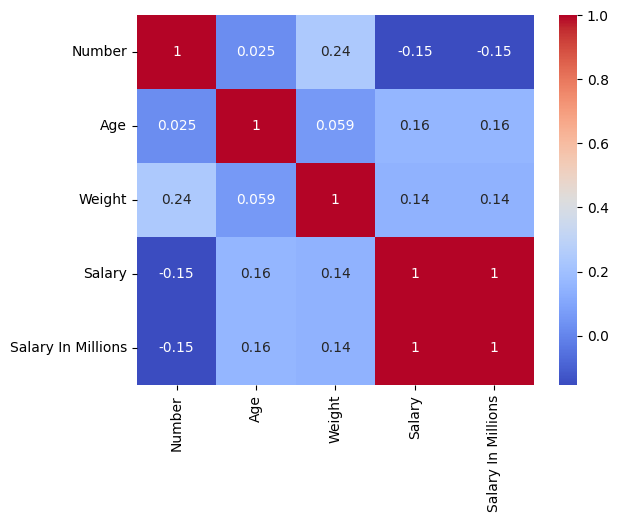

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

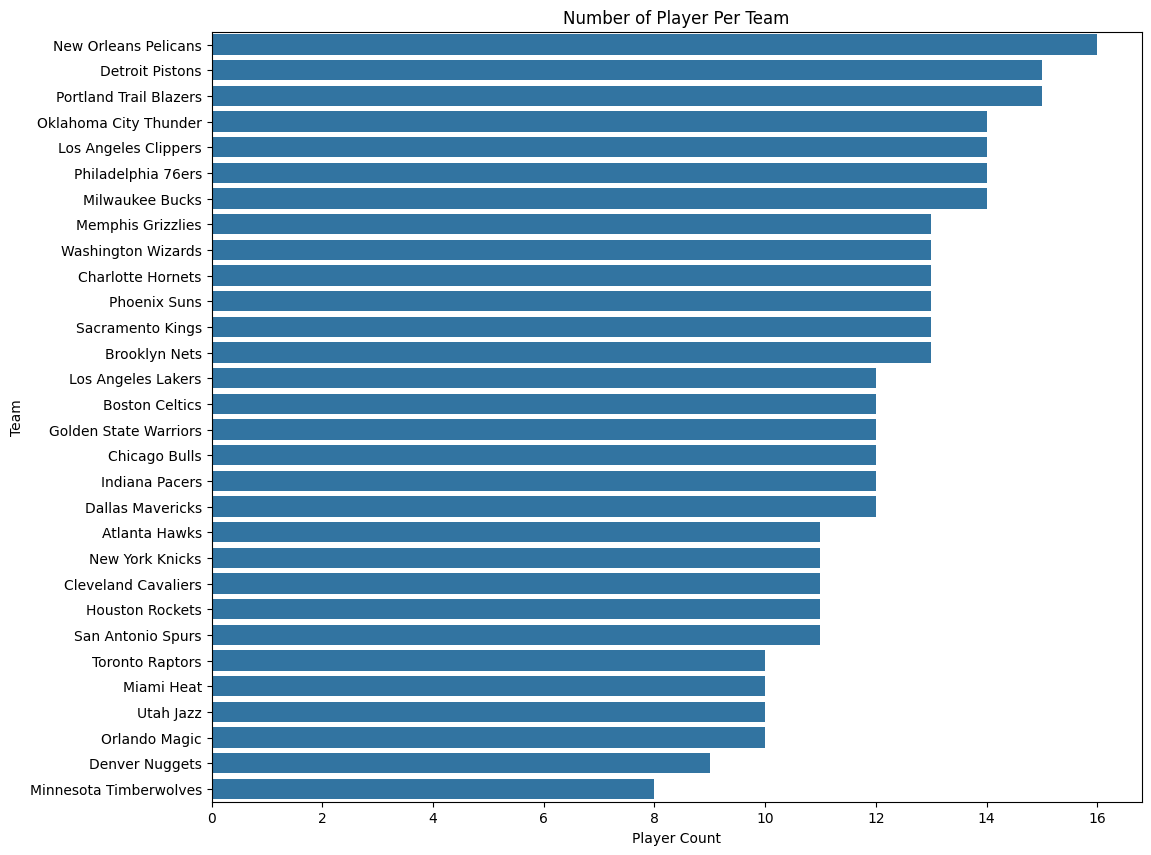

In [79]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, y='Team', order=df['Team'].value_counts().index)
plt.xlabel('Player Count')
plt.ylabel('Team')
plt.title('Number of Player Per Team')
plt.show()

C:\Users\Nirav\AppData\Local\Temp\ipykernel_22912\170747945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_salary.values, y=team_salary.index, palette='Greens_d')


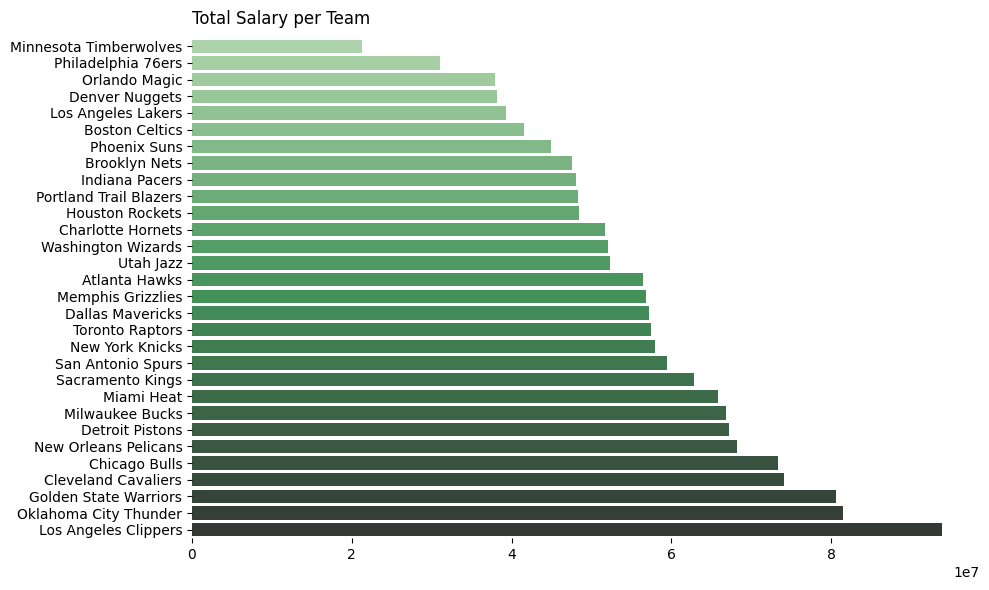

In [80]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=team_salary.values, y=team_salary.index, palette='Greens_d')
plt.title('Total Salary per Team', loc='left', pad=10)
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



In [81]:
# Set minimalist seaborn theme
sns.set_theme(style="whitegrid")  # or "white" for even more minimal

# Apply consistent font and style
plt.rcParams.update({
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "axes.edgecolor": "#333333",
    "axes.linewidth": 0.8,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial",
    "figure.dpi": 120
})

C:\Users\Nirav\AppData\Local\Temp\ipykernel_22912\3484102990.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Salary', y='Position', data=df, estimator='mean', ci=None, palette='coolwarm')
C:\Users\Nirav\AppData\Local\Temp\ipykernel_22912\3484102990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Salary', y='Position', data=df, estimator='mean', ci=None, palette='coolwarm')


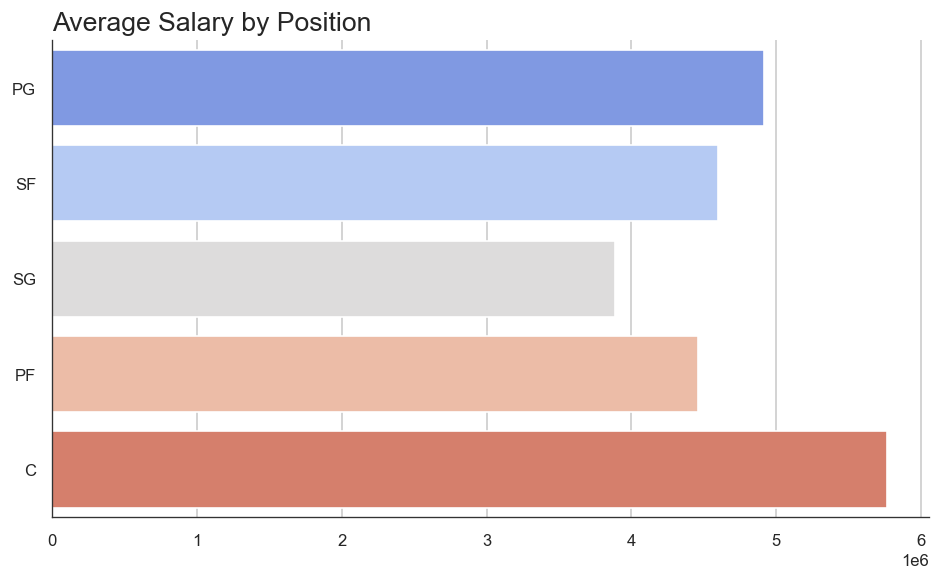

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(x='Salary', y='Position', data=df, estimator='mean', ci=None, palette='coolwarm')
plt.title('Average Salary by Position', loc='left')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()

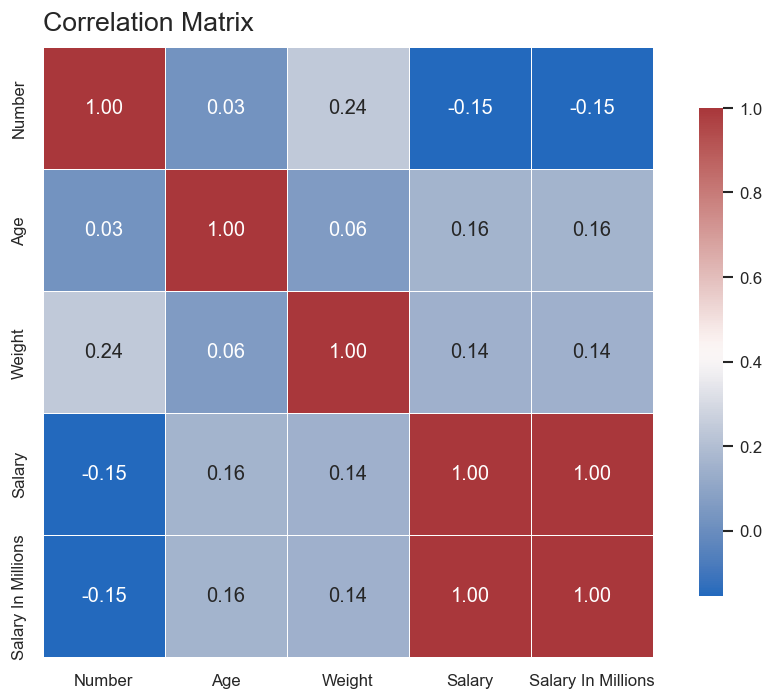

In [83]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix", loc='left', pad=10)
plt.tight_layout()
plt.show()


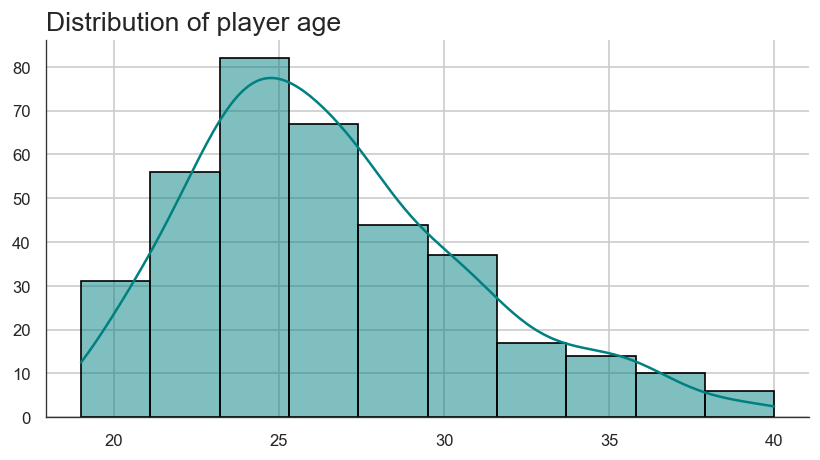

In [84]:
plt.figure(figsize=(7,4))
sns.histplot(data = df['Age'], bins = 10 , kde=True, color='teal', edgecolor='black')
plt.title("Distribution of player age", loc='left')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()

In [85]:
df

,Name,Team,Number,Position,Age,Height,Weight,University,Salary,Salary In Millions,Role Type
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337,7.73,BackCourt
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117,6.80,BackCourt
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640,1.15,BackCourt
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960,1.17,BackCourt
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160,2.17,BackCourt
...,...,...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440,1.35,BackCourt
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348,0.98,BackCourt
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800,2.24,BackCourt
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333,2.43,BackCourt


In [97]:
df[['Name','Age','Salary','Team']].sort_values(ascending=False, by='Salary')

,Name,Age,Salary,Team
33,Carmelo Anthony,32.0,22875000,New York Knicks
339,Chris Bosh,32.0,22192730,Miami Heat
100,Chris Paul,31.0,21468695,Los Angeles Clippers
414,Kevin Durant,27.0,20158622,Oklahoma City Thunder
164,Derrick Rose,27.0,20093064,Chicago Bulls
...,...,...,...,...
184,Lorenzo Brown,25.0,111444,Detroit Pistons
175,Jordan McRae,25.0,111196,Cleveland Cavaliers
135,Alan Williams,23.0,83397,Phoenix Suns
130,Phil Pressey,25.0,55722,Phoenix Suns


In [ ]:
df.columns


Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'University', 'Salary', 'Salary In Millions', 'Role Type'],
      dtype='object')

In [ ]:
a = [1,2,3,4,5]

res = [val ** 2 for val in a ]
res

[1, 4, 9, 16, 25]

In [103]:
res = [val for val in a if val % 2 == 0]
res

[2, 4]

In [107]:
c= [37,39,38,44,41]
fran = [(val*(9/5)+32) for val in c ]
fran

[98.60000000000001, 102.2, 100.4, 111.2, 105.8]

In [111]:
li = [[1, 2], [3, 4], [5, 6]]
fl = [item  for sub in li for item in sub]
fl

[1, 2, 3, 4, 5, 6]

In [118]:
str1 = "abc123def4567"
l1 = [int(item) for item in str1 if item.isdigit()]
l1

[1, 2, 3, 4, 5, 6, 7]

In [124]:
char =["Filter", "Words", "Longer" ,"Than", "3", "Characters"]
new = [val for val in char if val.isalpha() and len(val)>3 ]
new

['Filter', 'Words', 'Longer', 'Than', 'Characters']

In [128]:
prime1 = [val for val in range(2,100) if all(val%i != 0 for i in range(2,int(val**0.5)+1))]
prime1

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [3]:
import pandas as pd

data1 = {'Name':['Jai', 'Anuj', 'Jai', 'Princi',
                 'Gaurav', 'Anuj', 'Princi', 'Abhi'],
        'Age':[27, 24, 22, 32,
               33, 36, 27, 32],
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj',
                   'Jaunpur', 'Kanpur', 'Allahabad', 'Aligarh'],
        'Qualification':['Msc', 'MA', 'MCA', 'Phd',
                         'B.Tech', 'B.com', 'Msc', 'MA']} 

df = pd.DataFrame(data1)
df

,Name,Age,Address,Qualification
0,Jai,27,Nagpur,Msc
1,Anuj,24,Kanpur,MA
2,Jai,22,Allahabad,MCA
3,Princi,32,Kannuaj,Phd
4,Gaurav,33,Jaunpur,B.Tech
5,Anuj,36,Kanpur,B.com
6,Princi,27,Allahabad,Msc
7,Abhi,32,Aligarh,MA


In [9]:
dfg = df.groupby(['Name','Qualification'])['Age'].groups
display(dfg)

{('Abhi', 'MA'): [7], ('Anuj', 'B.com'): [5], ('Anuj', 'MA'): [1], ('Gaurav', 'B.Tech'): [4], ('Jai', 'MCA'): [2], ('Jai', 'Msc'): [0], ('Princi', 'Msc'): [6], ('Princi', 'Phd'): [3]}

In [12]:
df.groupby(['Name'], sort = False)['Age'].groups

{'Jai': [0, 2], 'Anuj': [1, 5], 'Princi': [3, 6], 'Gaurav': [4], 'Abhi': [7]}

In [14]:
# example dataframe
example = {'Team':['Arsenal', 'Manchester United', 'Arsenal',
                   'Arsenal', 'Chelsea', 'Manchester United',
                   'Manchester United', 'Chelsea', 'Chelsea', 'Chelsea'],
                   
           'Player':['Ozil', 'Pogba', 'Lucas', 'Aubameyang',
                       'Hazard', 'Mata', 'Lukaku', 'Morata', 
                                         'Giroud', 'Kante'],
                                         
           'Goals':[5, 3, 6, 4, 9, 2, 0, 5, 2, 3] }

df = pd.DataFrame(example)

print(df)

                Team      Player  Goals
0            Arsenal        Ozil      5
1  Manchester United       Pogba      3
2            Arsenal       Lucas      6
3            Arsenal  Aubameyang      4
4            Chelsea      Hazard      9
5  Manchester United        Mata      2
6  Manchester United      Lukaku      0
7            Chelsea      Morata      5
8            Chelsea      Giroud      2
9            Chelsea       Kante      3


In [17]:
total_goals = df['Goals'].groupby(df['Team'])
total_goals.mean()

Team
Arsenal              5.000000
Chelsea              4.750000
Manchester United    1.666667
Name: Goals, dtype: float64

In [18]:
data1 = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'],
         'Age': [27, 24, 22, 32],
         'Address': ['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'],
         'Qualification': ['Msc', 'MA', 'MCA', 'Phd']}

data2 = {'Name': ['Abhi', 'Ayushi', 'Dhiraj', 'Hitesh'],
         'Age': [17, 14, 12, 52],
         'Address': ['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'],
         'Qualification': ['Btech', 'B.A', 'Bcom', 'B.hons']}

df = pd.DataFrame(data1, index=[0, 1, 2, 3])

df1 = pd.DataFrame(data2, index=[4, 5, 6, 7])


In [19]:
frames = [df,df1]
res1 = pd.concat(frames)
res1

,Name,Age,Address,Qualification
0,Jai,27,Nagpur,Msc
1,Princi,24,Kanpur,MA
2,Gaurav,22,Allahabad,MCA
3,Anuj,32,Kannuaj,Phd
4,Abhi,17,Nagpur,Btech
5,Ayushi,14,Kanpur,B.A
6,Dhiraj,12,Allahabad,Bcom
7,Hitesh,52,Kannuaj,B.hons
